In [135]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [139]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') 
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

In [141]:
X_train /= 255.0
X_test /=255.0

In [143]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [145]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [147]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8124 - loss: 0.5695 - val_accuracy: 0.9807 - val_loss: 0.0669
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9656 - loss: 0.1188 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9739 - loss: 0.0873 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9783 - loss: 0.0711 - val_accuracy: 0.9884 - val_loss: 0.0423
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9901 - val_loss: 0.0365
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9824 - loss: 0.0548 - val_accuracy: 0.9918 - val_loss: 0.0308
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.9913 - val_loss: 0.0342
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9841 -

In [151]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9895 - loss: 0.0326

✅ Test Accuracy: 99.17%


In [165]:
# Make sure predictions are class labels (not arrays)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Converts from probabilities to labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [167]:
correct_indices = [i for i in range(len(y_test)) if y_pred[i] == y_test[i]]
incorrect_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


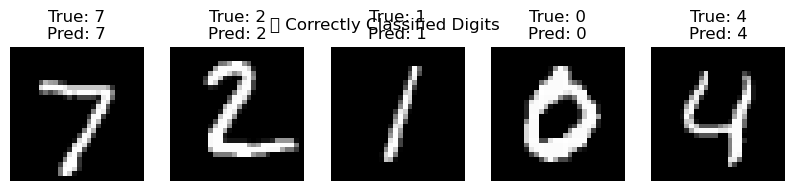

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


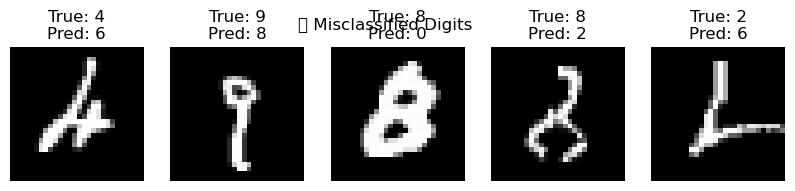

In [169]:
plot_digits(correct_indices, "✅ Correctly Classified Digits")
plot_digits(incorrect_indices, "❌ Misclassified Digits")


In [171]:
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

📉 Confusion Matrix:
 [[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1133    0    0    0    0    2    0    0    0]
 [   3    1 1026    0    0    0    1    1    0    0]
 [   0    0    1 1004    0    3   